## 线性回归

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np

### 最简单的线性模型
>直线拟合的模型方程
为 y = ax + b，其中 a 是直线斜率， b 是直线截距

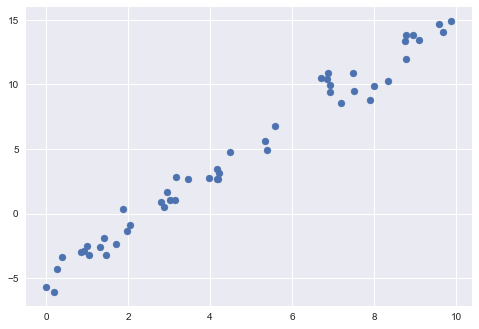

In [9]:
rng=np.random.RandomState(1)
x=10*rng.rand(50)
y=2*x-5+rng.randn(50)
plt.scatter(x,y)

randn()函数根据给定的维度返回一个或一组样本，具有标准的正态分布

rand()函数是生成0-1之间的数

函数中，均可加入维度参数

如rand(2,4)，是生成2行4列的0-1之间的随机数

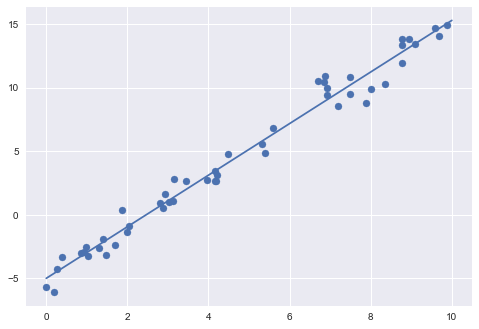

In [19]:
#利用Scikir Learn中，LinaerRegression评估器来拟合数据
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)  #定义一个线性回归模型对象
model.fit(x[:, np.newaxis],y)  #喂入数据，进行训练

#生成测试数据，进行预测
xfit=np.linspace(0,10,100)
yfit=model.predict(xfit[:,np.newaxis])

#将预测结果画出
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [22]:
#数据的斜率和截距都在模型的拟合参数中,Scikit-Learn 通常会在参数后面加一条下划线，即 coef_ 和 intercept_：
print("模型的斜率是：",model.coef_)
print("模型的截距是：",model.intercept_)

模型的斜率是： [ 2.02720881]
模型的截距是： -4.99857708555


### 除了简单的直线拟合，它还可以处理多维度的线性回归模型：
---
>y = a0 + a1x1 + a2x2 + …

In [66]:
#创建一些数据
rng=np.random.RandomState(1)
X=10*rng.rand(100,3)
y=0.5+np.dot(X,[1.5,-2,1.])  #[]表示为一个列向量
y.shape
print("X.shape is ",X.shape)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

X.shape is  (100, 3)
0.5
[ 1.5 -2.   1. ]


### what？为什么100x3的矩阵和1x3的矩阵能相乘？
---
* 实际这里一开始的理解是错的，如下所示，x为3x4的矩阵，y是4x1的矩阵

* 注意到，x中是[[],[],[]]中括号里嵌套，代表的3行，而[,,,]直接逗号隔开，代表的是，一个元素为一行

In [76]:
x=np.arange(1,13)
x=x.reshape(3,4)
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [77]:
x[0][3]

4

In [79]:
y=np.arange(1,5)
y

array([1, 2, 3, 4])

In [80]:
re=np.dot(x,y)
re

array([ 30,  70, 110])

### 基函数回归

* 可以通过基函数对原始数据进行变换，从而将变量间的线性回归模型转换为非线性回归
模型

#### 1. 多项式基函数

In [85]:
from sklearn.preprocessing import PolynomialFeatures
x=np.array([2,3,4])
poly=PolynomialFeatures(3,include_bias=False)
poly.fit_transform(x[:,None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

In [104]:
from sklearn.pipeline import make_pipeline
poly_model=make_pipeline(PolynomialFeatures(7),LinearRegression())  #这是一个经过7次多项式回归模型

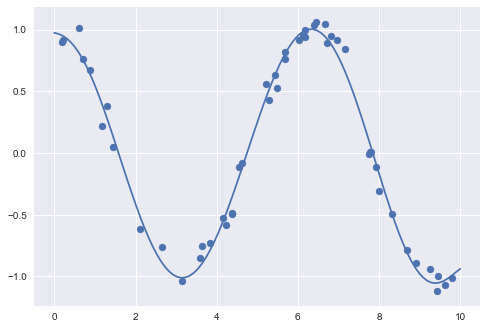

In [105]:
rng = np.random.RandomState(0)
x = 10 * rng.rand(50)
y = np.cos(x) + 0.1 * rng.randn(50)

#喂入数据
poly_model.fit(x[:, np.newaxis], y)
#进行预测
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)


### 2. 高斯基函数
>Scikit-Learn 并没有内置这些高斯基函数，但我们可以自己写一个转换器来创建高斯基函
数

In [110]:
from sklearn.base import BaseEstimator,TransformerMixin

class GaussianFeatures(BaseEstimator,TransformerMixin):
    """一维输入均匀分布的高斯分布"""
    def __init__(self,N,width_factor=2.0):
        self.N=N
        self.width_factor=width_factor
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    def fit(self, X, y=None):
    # 在数据区间中创建N个高斯分布中心
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,self.width_, axis=1)

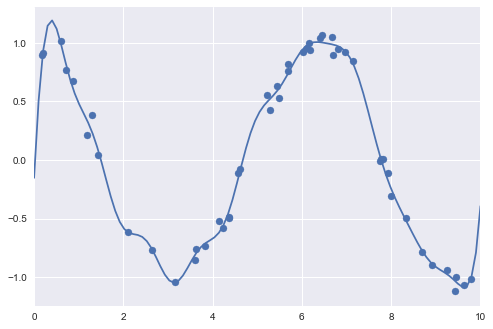

In [111]:
gauss_model = make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

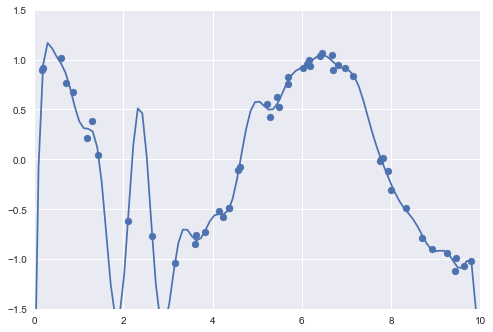

In [113]:
#过拟合实 例
model = make_pipeline(GaussianFeatures(30),
LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

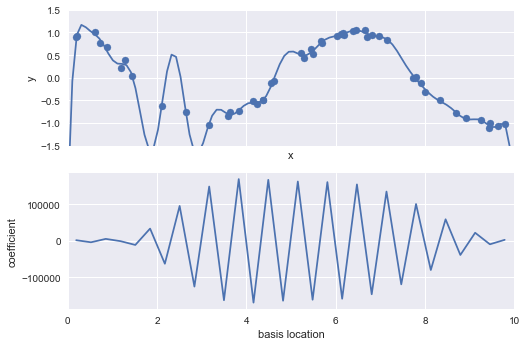

In [120]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',ylabel='coefficient',xlim=(0, 10))
        
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

### 1. 岭回归（L2范数正则化）
>岭回归的一个重要优点是，它可以非常高效地计算——因此相比原始的线性回归模型，几乎没有消耗更多的计算资源。

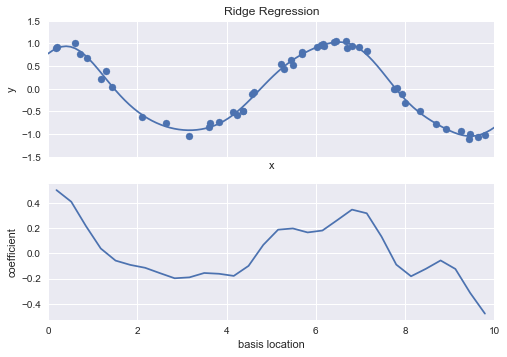

In [125]:
from sklearn.linear_model import Ridge
model=make_pipeline(GaussianFeatures(30),Ridge(alpha=0.1))
basis_plot(model,title='Ridge Regression')

### 2. Lasso正则化（L1范数）
另一种常用的正则化被称为 Lasso，其处理方法是对模型系数绝对值的和（L1 范数）进行
惩罚：

$P=\alpha \sum_{n=1}^{N}\left|\theta_{n}\right|$


虽然它在形式上非常接近岭回归，但是其结果与岭回归差别很大。例如，由于其几何特
性， Lasso 正则化倾向于构建稀疏模型；也就是说，它更喜欢将模型系数设置为 0。

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


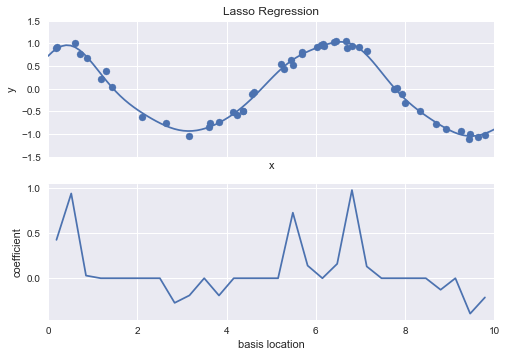

In [126]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')


---




## The End
